#Least-squares Fitting Tests and Linear Fitting

Currently having issues with how the scipy.optimize.curve_fit function is calculating the errors in the fit to hot and cool branches of the $\mathrm{EM}(T)$ curve. Errors seem to be too low, especially in the low $T_N$ cases where the fit is pretty bad for both the hot and the cool sides, especially the cool sides.

Let's create a few test cases and then try out the SciPy curve fitting procedure as well as a homebrewed one.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

##Case 1

First, let's try a superposition of a linear function with an oscillatory (sine wave) function and maybe add in some noise as well. Our function will look like $$f_1(x)=x + \sin{x} + \mathrm{noise}$$

In [60]:
def function_1(x,period,noise_level):
    linear = x
    oscillate = np.sin(period*x)
    np.random.seed()
    noise = noise_level*np.max(oscillate)*np.random.rand(len(x))
    return linear + oscillate + noise

In [61]:
x = np.linspace(0,2*np.pi,100)
y = function_1(x,5,0.75)

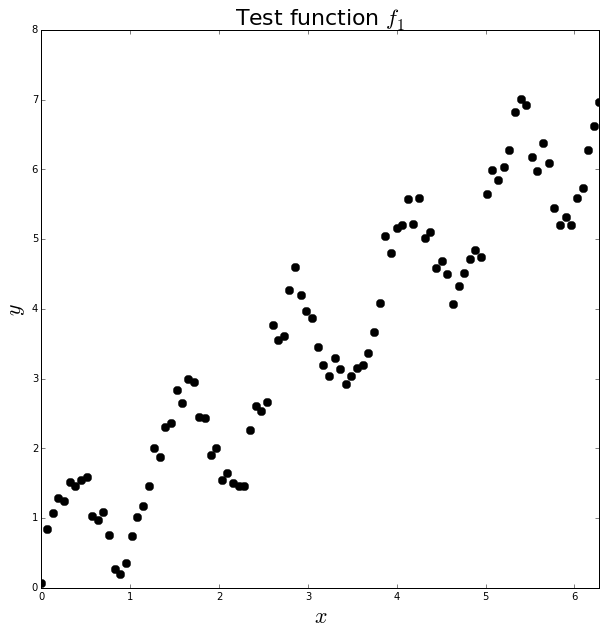

In [62]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_1$',fontsize=22)
plt.show()

Now, let's try to perform a linear fit to this function with the SciPy curve fitting function, using both a weighted and an unweighted approach.

In [63]:
def linear_fit(x,a,b):
    return a*x + b

In [64]:
pars,covar = curve_fit(linear_fit,x,y)

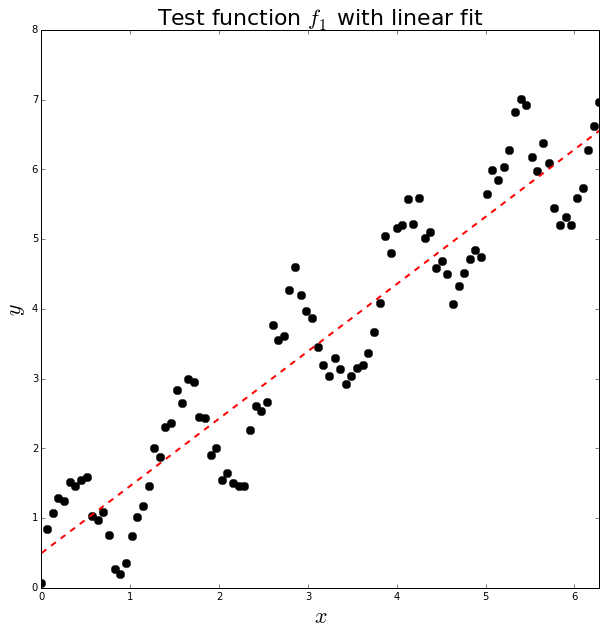

In [65]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.plot(x,pars[0]*x + pars[1],'r--',linewidth=2.0)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_1$ with linear fit',fontsize=22)
plt.show()

Now, what is the associated error with each of the fit parameters? Obviously, the curve (or at least the oscillatory part of it) is not well described by a linear function. Thus, our fit parameters should have a decent amount of uncertainty associated with them.

In [66]:
print("a_fit = %f, b_fit = %f"%(pars[0],pars[1]))
print("sigma_a = %f, sigma_b = %f"%(np.sqrt(np.diag(covar))[0],np.sqrt(np.diag(covar))[1]))

a_fit = 0.964193, b_fit = 0.497859
sigma_a = 0.036942, sigma_b = 0.134347


Next, let's use a Monte-Carlo approach to estimate the uncertainty at each point for our function.

In [67]:
y_mc_f1 = []
n_mc = 100
for i in range(n_mc):
    y_mc_f1.append(function_1(x,5,0.75))
    
y_mean_f1 = np.mean(y_mc_f1,axis=0)
x_mean_f1 = x
y_sigma_f1 = np.std(y_mc_f1,axis=0)

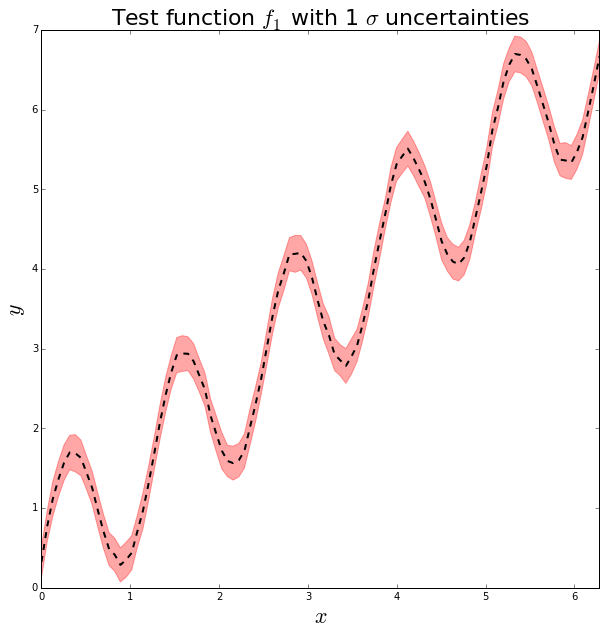

In [68]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.fill_between(x,y_mean_f1 - y_sigma_f1,y_mean_f1 + y_sigma_f1,facecolor='red',edgecolor='red',alpha=0.35)
ax.plot(x,y_mean_f1,'k--',linewidth=2.0)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_1$ with 1 $\sigma$ uncertainties',fontsize=22)
plt.show()

Next, we'll perform a linear to this function using the 1 $\sigma$ uncertainties generated using our MC method.

In [69]:
pars,covar = curve_fit(linear_fit,x,y_mean_f1,sigma=y_sigma_f1,absolute_sigma=True)

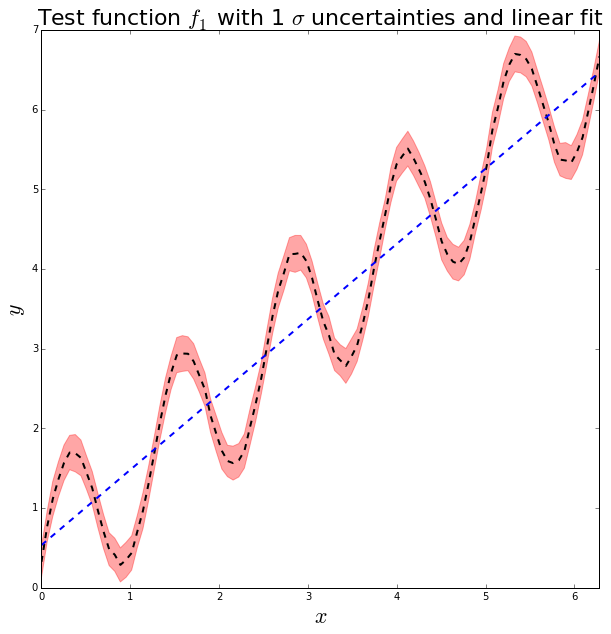

In [70]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.fill_between(x,y_mean_f1 - y_sigma_f1,y_mean_f1 + y_sigma_f1,facecolor='red',edgecolor='red',alpha=0.35)
ax.plot(x,y_mean_f1,'k--',linewidth=2.0)
ax.plot(x,pars[0]*x + pars[1],'b--',linewidth=2.0)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_1$ with 1 $\sigma$ uncertainties and linear fit',fontsize=22)
plt.show()

Is there any difference between the fit uncertainties/errors when we use the $\sigma$ weights and when we don't?

In [71]:
print("a_fit = %f, b_fit = %f"%(pars[0],pars[1]))
print("sigma_a = %f, sigma_b = %f"%(np.sqrt(np.diag(covar))[0],np.sqrt(np.diag(covar))[1]))

a_fit = 0.944440, b_fit = 0.536058
sigma_a = 0.011657, sigma_b = 0.042423


##Case 2

In [72]:
def function_2(x,b,noise_level):
    np.random.rand()
    return -x**2 + b*x + noise_level*b*np.random.rand(len(x))

In [73]:
x = np.linspace(0,10,100)
y = function_2(x,20,0.5)

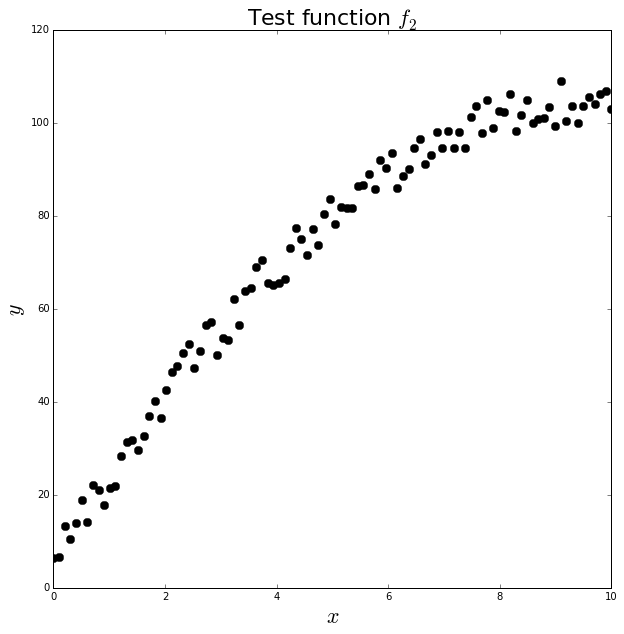

In [74]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_2$',fontsize=22)
plt.show()

Now, let's again do a linear fit to the function.

In [75]:
pars,covar = curve_fit(linear_fit,x,y)

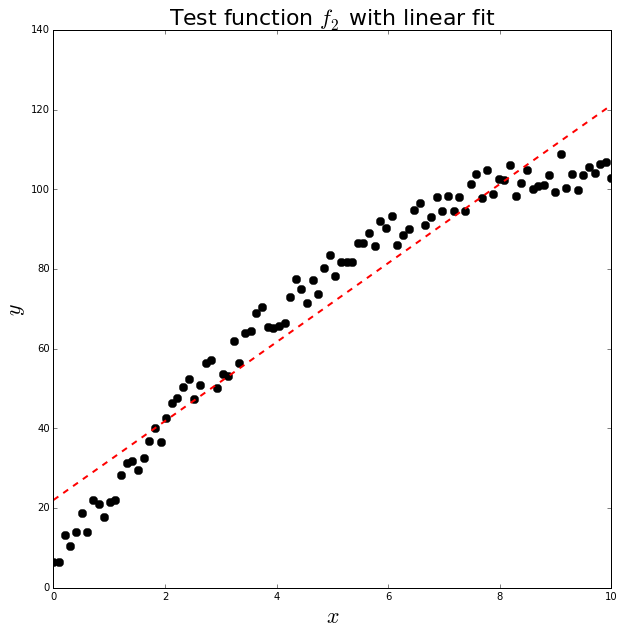

In [76]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.plot(x,pars[0]*x + pars[1],'r--',linewidth=2.0)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_2$ with linear fit',fontsize=22)
plt.show()

In [77]:
print("a_fit = %f, b_fit = %f"%(pars[0],pars[1]))
print("sigma_a = %f, sigma_b = %f"%(np.sqrt(np.diag(covar))[0],np.sqrt(np.diag(covar))[1]))

a_fit = 9.909982, b_fit = 22.024065
sigma_a = 0.287247, sigma_b = 1.662604


Again, let's try our MC approach for this function as well.

In [78]:
y_mc = []
n_mc = 1000
for i in range(n_mc):
    y_mc.append(function_2(x,20,0.5))
    
y_mean = np.mean(y_mc,axis=0)
y_sigma = np.std(y_mc,axis=0)

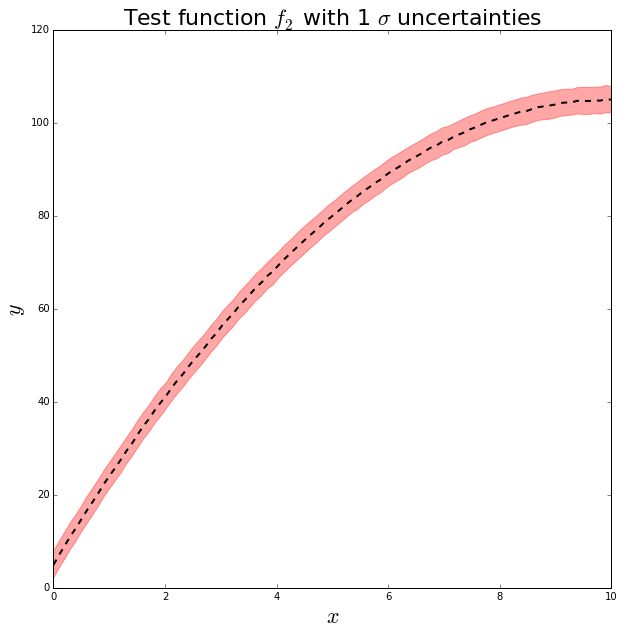

In [79]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.fill_between(x,y_mean - y_sigma,y_mean + y_sigma,facecolor='red',edgecolor='red',alpha=0.35)
ax.plot(x,y_mean,'k--',linewidth=2.0)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_2$ with 1 $\sigma$ uncertainties',fontsize=22)
plt.show()

In [80]:
pars,covar = curve_fit(linear_fit,x,y_mean,sigma=y_sigma,absolute_sigma=True)

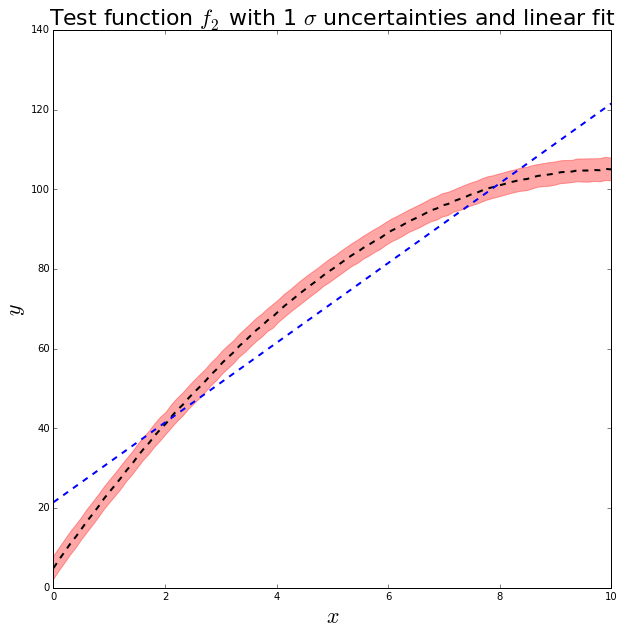

In [81]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.fill_between(x,y_mean - y_sigma,y_mean + y_sigma,facecolor='red',edgecolor='red',alpha=0.35)
ax.plot(x,y_mean,'k--',linewidth=2.0)
ax.plot(x,pars[0]*x + pars[1],'b--',linewidth=2.0)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_2$ with 1 $\sigma$ uncertainties and linear fit',fontsize=22)
plt.show()

In [82]:
print("a_fit = %f, b_fit = %f"%(pars[0],pars[1]))
print("sigma_a = %f, sigma_b = %f"%(np.sqrt(np.diag(covar))[0],np.sqrt(np.diag(covar))[1]))

a_fit = 10.006157, b_fit = 21.463556
sigma_a = 0.098715, sigma_b = 0.571106


##Case 3

Finally, let's try to do a linear fit to some function that has no linear component at all.

In [83]:
def function_3(x,noise_level):
    np.random.seed()
    return noise_level*np.random.rand(len(x)) - x**3 - 2*x**2

In [84]:
x = np.linspace(-2,1,100)
y = function_3(x,0.2)

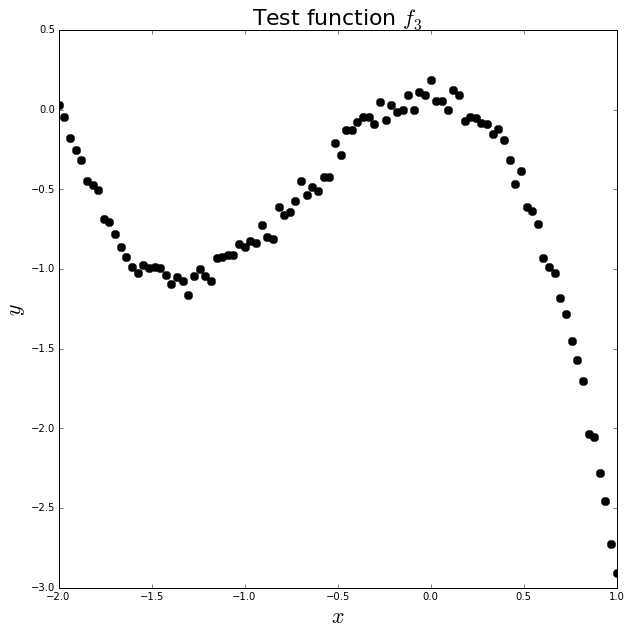

In [85]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_3$',fontsize=22)
plt.show()

We'll select a region on this plot that is roughly linear by inspection.

In [86]:
y_linear = y[(x>-1.5) & (x<0.25)]
x_linear = x[(x>-1.5) & (x<0.25)]

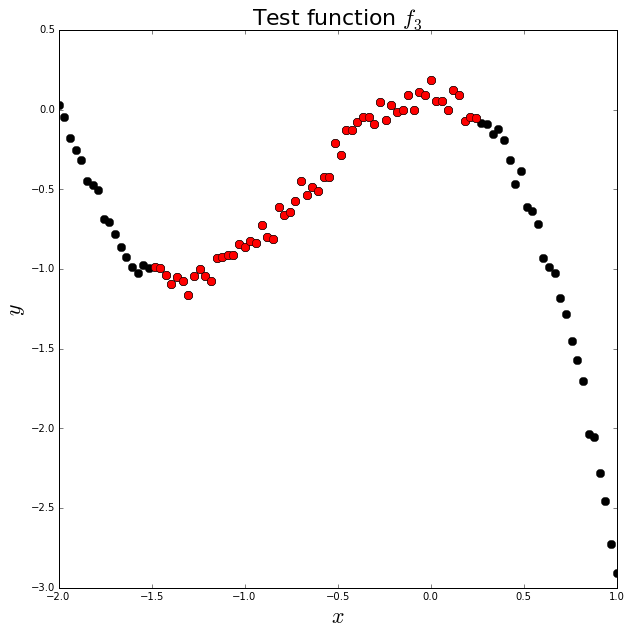

In [87]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.plot(x_linear,y_linear,'ro',markersize=8)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_3$',fontsize=22)
plt.show()

Now, we'll fit to this roughly linear section using the same function as before.

In [88]:
pars,covar = curve_fit(linear_fit,x_linear,y_linear)

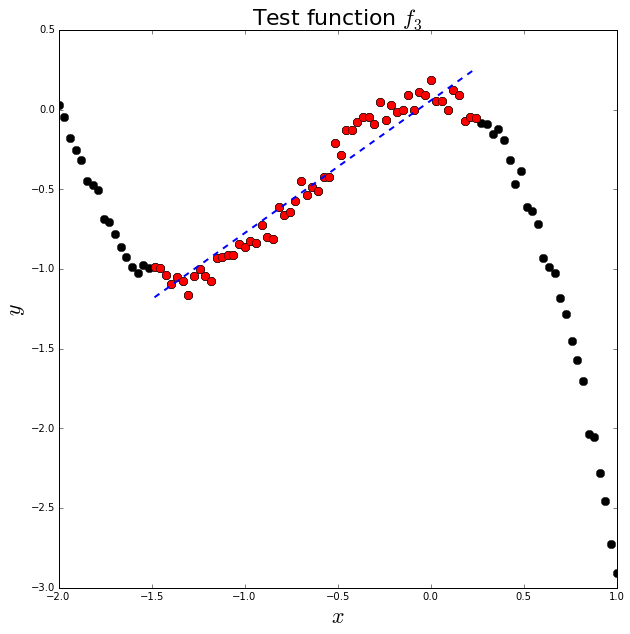

In [89]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.plot(x_linear,y_linear,'ro',markersize=8)
ax.plot(x_linear,pars[0]*x_linear + pars[1],'b--',linewidth=2)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_3$',fontsize=22)
plt.show()

In [90]:
print("a_fit = %f, b_fit = %f"%(pars[0],pars[1]))
print("sigma_a = %f, sigma_b = %f"%(np.sqrt(np.diag(covar))[0]/pars[0],np.sqrt(np.diag(covar))[1]/pars[1]))

a_fit = 0.830917, b_fit = 0.055877
sigma_a = 0.038666, sigma_b = 0.461151


##Bootstrap Method

Let's return to our data from Case 1. We have the mean $\bar{y}$ from our randomly-fluctuating data set and a set of standard deviations $\{\sigma\}$ for each point $\bar{y}_i$. We'd now like to use the bootstrap method to estimate the errors associated with the fit to our mean curve. To do this, we first generate $1\le j\le N_B$ datasets using a Monte-Carlo like method to add fluctuations in each dataset based on $\sigma_i$. For each of the $N_B$ data sets, we calculate the fit to the data $(a_j,b_j)$. Then, we take the standard deviation of all of these results,  $\sigma_a,\sigma_b$, as our confidence interval for $(\bar{a},\bar{b})$.

In [91]:
def bootstrap_method(xdata,ydata,yerrors,Nb):
    
    #generate Nb synthetic datasets and do curve fitting
    fit_boot =[]
    for i in range(Nb):
        boot_delta = []
        [boot_delta.append(np.random.normal(0,err,1)[0]) for err in yerrors]
        y_boot = ydata + boot_delta
        pars,covar = curve_fit(linear_fit,xdata,y_boot)
        fit_boot.append(pars)
        
    #Take the standard deviation and mean of the parameters
    fit_boot = np.array(fit_boot)
    fit_mean = np.mean(fit_boot,axis=0)
    fit_sigma = np.std(fit_boot,axis=0)
    
    return fit_mean,fit_sigma        

Now, let's apply our boostrap method to our simulated data sets from Case 1.

In [92]:
f1_mean,f1_sigma = bootstrap_method(x_mean_f1,y_mean_f1,y_sigma_f1,1000)

In [93]:
print("<a> = %f, <b> = %f"%(f1_mean[0],f1_mean[1]))
print("sigma_a = %f, sigma_b = %f"%(f1_sigma[0],f1_sigma[1]))

<a> = 0.942135, <b> = 0.553536
sigma_a = 0.011819, sigma_b = 0.044543


This is about the same as if we had used the covariance matrix from the resulting fit. Does it make any difference if we instead just do the fit for each one of our original simulated data sets and then calculate the error from those resulting standard deviations?

In [96]:
fit_mc_f1 = []
for y in y_mc_f1:
    pars,covar = curve_fit(linear_fit,x_mean_f1,y)
    fit_mc_f1.append(pars)
    
mc_mean = np.mean(fit_mc_f1,axis=0)
mc_sigma = np.std(fit_mc_f1,axis=0)

print("<a> = %f, <b> = %f"%(mc_mean[0],mc_mean[1]))
print("sigma_a = %f, sigma_b = %f"%(mc_sigma[0],mc_sigma[1]))

<a> = 0.941707, <b> = 0.554818
sigma_a = 0.010818, sigma_b = 0.040390


It doesn't appear to make much difference with regards to which method we use, though our simulated data in this case is quite mundane. Next, let's try this method out on some sample $\mathrm{EM}(T)$ curves for varying $T_N$.

##Example Emission Measure Data Set